<a href="https://www.kaggle.com/satyabrataroy/simple-house-price-prediction-model-30-days-ml?scriptVersionId=88449377" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# _House Price Prediction_

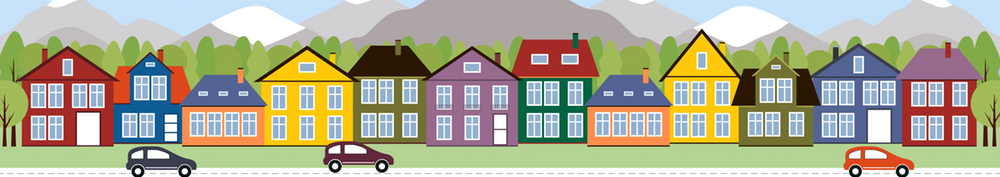!

# Objectives:

> In this notebook we will create the best model to **predict** the prices of residential homes in Ames, Iowa, using different **Regression Algorithms**

# Contents:

1. [Data Exploration](#Data-Exploration)

    1.1 [Import all the necessary libraries](#Import-all-the-necessary-libraries)
    
    1.2 [Load the Train & Test Data into Dataframe](#Load-the-Train-&-Test-Data-into-Dataframe)
    
    1.3 [Basic information about the datset](#Basic-information-about-the-datset)
    
2. [Model Parameters Defining](#Model-Parameters-Defining)

3. [Check Missing Data](#Check-Missing-Data)

4. [Handle Missing Data](#Handle-Missing-Data)

5. [Model Creation](#Model-Creation)
    
    5.1 [Random Forest Model](#Random-Forest-Model)
    
    5.2 [Gradient Boost Model](#Gradient-Boost-Model)
    
    5.3 [Linear Regression Model](#Linear-Regression-Model)
    
6. [Build the Best Model on full dataset](#Build-the-Best-Model-on-full-dataset)

7. [Save the Model](#Save-the-Model)

# Data Exploration

## Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

## Load the Train & Test Data into Dataframe

In [2]:
train_df = pd.read_csv('../input/home-data-for-ml-course/train.csv')
test_df = pd.read_csv('../input/home-data-for-ml-course/test.csv')

## Basic information about the datset

In [3]:
train_df.shape

(1460, 81)

In [4]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
test_df.shape

(1459, 80)

# Model Parameters Defining

In [6]:
numeric_features = train_df.select_dtypes(exclude=['object']).columns

In [7]:
numeric_features

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [8]:
numeric_features = list(numeric_features)[:-1]

In [9]:
numeric_df = train_df[numeric_features]

In [10]:
numeric_df.shape

(1460, 37)

# Check Missing Data

In [11]:
numeric_df.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

# Handle Missing Data

In [12]:
numeric_df = numeric_df.fillna(0)

In [13]:
numeric_df.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [14]:
X = numeric_df.copy()
y = train_df.SalePrice

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Model Creation

## Random Forest Model

In [16]:
rf_model = RandomForestRegressor(random_state=1, n_estimators=700)
rf_model.fit(X_train, y_train)
rf_val_prediction = rf_model.predict(X_test)

rf_val_rmse = np.sqrt(mean_squared_error(rf_val_prediction, y_test))

print(f'RMSE : {rf_val_rmse}')

RMSE : 26198.750699743592


## Gradient Boost Model

In [17]:
gb_model = GradientBoostingRegressor(random_state=1, n_estimators=375, min_samples_split=3, min_samples_leaf=2)
gb_model.fit(X_train, y_train)
gb_val_prediction = gb_model.predict(X_test)
  
gb_val_rmse = round(np.sqrt(mean_squared_error(gb_val_prediction, y_test)), 2)

print(f'RMSE : {gb_val_rmse}')

RMSE : 20630.0


## Linear Regression Model

In [18]:
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)
linreg_val_prediction = linreg_model.predict(X_test)

linreg_val_rmse = np.sqrt(mean_squared_error(linreg_val_prediction, y_test))

print(f'RMSE : {linreg_val_rmse}')

RMSE : 33603.59801916976


# Build the Best Model on full dataset

## Create the Model

In [19]:
gb_model_on_full_data = GradientBoostingRegressor(random_state=1, n_estimators=375, min_samples_split=3, min_samples_leaf=2)
gb_model_on_full_data.fit(X, y)

GradientBoostingRegressor(min_samples_leaf=2, min_samples_split=3,
                          n_estimators=375, random_state=1)

## Create the Test Dataframe with selected Numeric Features

In [20]:
test_X = test_df[numeric_features]

In [21]:
test_X.shape

(1459, 37)

## Check the Missing Data

In [22]:
test_X.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      227
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       78
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

## Handle the Missing Data

In [23]:
test_X = test_X.fillna(0)

In [24]:
test_X.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

## Make predictions

In [25]:
# make predictions which we will submit. 
test_preds = gb_model_on_full_data.predict(test_X)

In [26]:
test_preds

array([128993.51858368, 162085.60871777, 184537.20502014, ...,
       187801.71368009, 116906.16679255, 237661.20446237])

# Save the Model

In [27]:
# The lines below shows how to save predictions in format used for competition scoring
output = pd.DataFrame({'Id': test_df.Id,
                      'SalePrice': test_preds})
output.to_csv('submission.csv', index=False)

## 